<div style='background-image: url("../../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computational Seismology</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Finite Differences - Advection Equation in 1D</div>
        </div>
    </div>
</div>


<p style="width:20%;float:right;padding-left:50px">
<img src=../../share/images/book.jpg>
<span style="font-size:smaller">
</span>
</p>


---

This notebook is part of the supplementary material 
to [Computational Seismology: A Practical Introduction](https://global.oup.com/academic/product/computational-seismology-9780198717416?cc=de&lang=en&#), 
Oxford University Press, 2016.

##### Authors:
* Lion Krischer ([@krischer](https://github.com/krischer))
* Heiner Igel ([@heinerigel](https://github.com/heinerigel))
---

This exercise illustrates two types of finite difference schemes and their stability when solving the one-dimensional advection equation.

<div style="clear:both"></div>

---

### Exercise

The source-free advection equation is given by

$$
\partial_t u(x, t) = v \partial_x u(x, t)
$$

where $u(x,t = 0)$ could be a displacement waveform at $t = 0$ (an initial condition) that is advected with velocity $v$. Replace the partial derivatives by finite-differences. Which approach do you expect to work best? Turn it into a programming exercise and write a simple finite-difference code and play around with different schemes (centered vs. non-centered finite differences). What do you observe?

---

#### Imports

The `matplotlib.use("nbagg")` line makes sure plots are done in the notebook at not in an external window.

In [7]:
# This is a configuration step for the exercise. Please run it before the simulation code!
import numpy as np
import matplotlib
# Show Plot in The Notebook
matplotlib.use("nbagg")
import matplotlib.pyplot as plt

---

#### Setup

This block initializes all necessary variables, arrays, and sets the initial conditions.

<IPython.core.display.Javascript object>


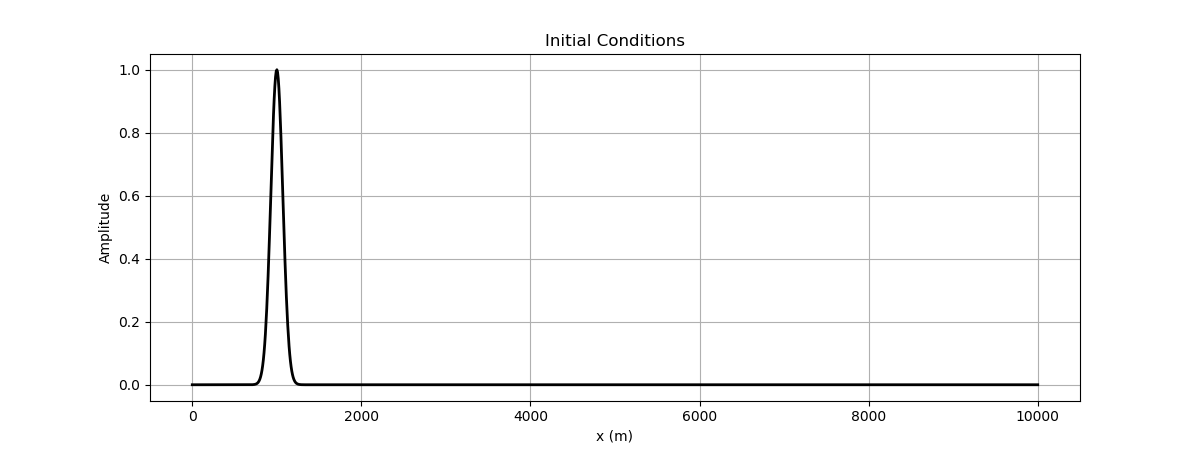

In [8]:
# Setup
nx = 1250          # Number of grid points.
v = 5500.          # Acoustic velocity in m/s.
x_max = 10000      # Length of the domain in m.
eps = 0.5          # CFL
tmax = 1.0         # Simulation time in s
isnap = 2          # Plot the solution each `isnap` timesteps.
sig = 100          # Sigma for the gaussian source time function
x0 = 1000          # Center point of the source time function

# Choose between a "upwind" and a "centered" finite difference scheme.
#fd_type = "upwind"
#fd_type = "centered"
fd_type = "downwind"


# Spatial setup
x = np.linspace(0, x_max, nx)
dx = x[1] - x[0]

# Use wave based CFL criterion, time step will be calculated from stability criterion
dt = eps * dx / v

# Simulation time
nt = int(tmax / dt)

# Initial condition in space.
sx = np.exp(-1.0 / sig ** 2.0 * (x - x0) ** 2.0);

# Initialize fields
u = sx
unew = np.zeros(nx)
du = np.zeros(nx)

# Plot the initial condition before simulating
plt.close()
plt.ioff()
plt.figure(figsize=(12, 4.5))
plt.title("Initial Conditions")
plt.grid()
plt.plot(x, u, color="black", lw=2)
plt.xlabel("x (m)")
plt.ylabel("Amplitude")
plt.show()

--- 

#### Time Loop

<IPython.core.display.Javascript object>


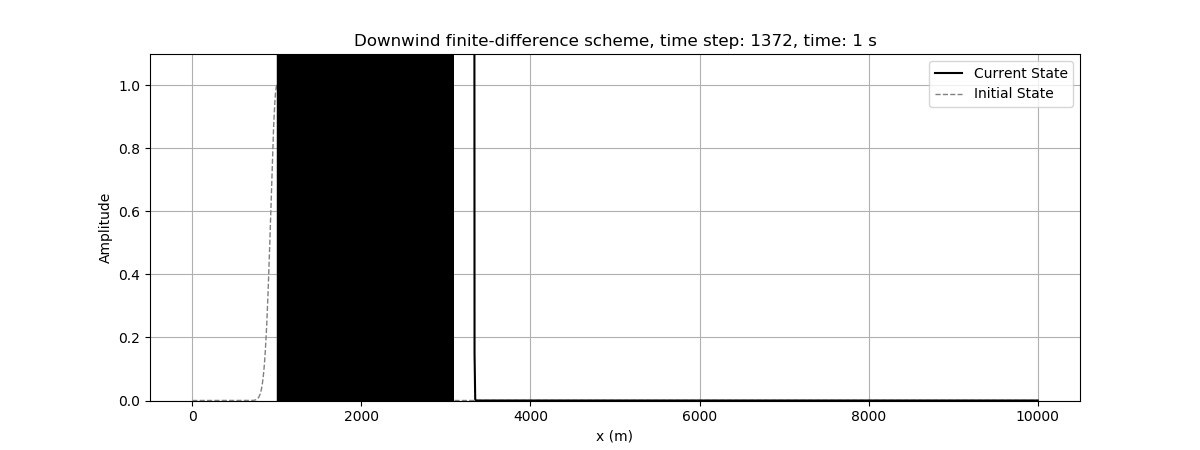

/usr/lib/python3/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in subtract
/usr/lib/python3/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in double_scalars
/usr/lib/python3/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars


In [9]:
# Advection Equation - Time Extrapolation

# Close plots, plot the initial condition for comparison 
plt.close()
plt.figure(figsize=(12, 4.5))

lines = plt.plot(x, u, color="black", lw=1.5, label="Current State")
plt.plot(x, u, color="0.5", ls="--", lw=1, label="Initial State")

plt.xlabel("x (m)")
plt.ylabel("Amplitude")
if fd_type == "upwind":
    title = "Upwind finite-difference scheme"
elif fd_type == "centered":
    title = "Centered finite-difference scheme"
elif fd_type == "downwind":
    title = "Downwind finite-difference scheme"
else:
    raise ValueError("fd_type must be 'forward' or 'centered'")

plt.grid()
plt.ylim(u.min(), u.max() * 1.1)
plt.legend()
plt.ion()
plt.show()


# Here we start the actual time extrapolation, the task for you is to calculate 
# the space derivative of u(x) and write it into du(x) 

for i in range(nt):
    du[:] = 0.0
    for j in range(1, nx - 1):
        if fd_type == "upwind":
            du[j] = (u[j] - u[j - 1]) / dx
        elif fd_type == "centered":
            du[j] = (u[j + 1] - u[j - 1]) / (2.0 * dx)
        elif fd_type == "downwind":
            du[j] = (u[j + 1] - u[j]) / dx

# time extrapolation scheme (Euler)
    unew = u - dt * v * du

# The new presence is the current future!
    u = unew
    
    # Update plot if desired.
    if not i % isnap:
        for l in lines:
            l.remove()
            del l
        lines = plt.plot(x, unew, color="black", lw=1.5)
        plt.title(title + ", time step: %i, time: %.2g s" % (i, i * dt))
        plt.gcf().canvas.draw()
    

    
plt.ioff()
plt.show()